connected to: ${ser.portstr}
Data:


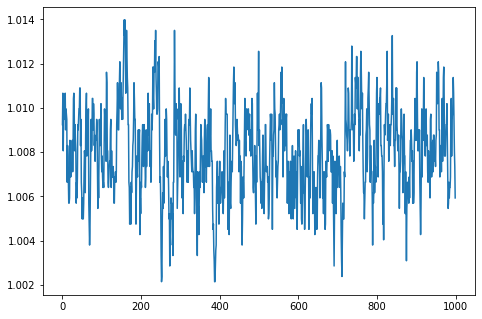

In [24]:
import serial
import time
from matplotlib import pyplot as plt
import numpy as np

f = open('data_adxl.csv', 'w')

ser = serial.Serial(
 port='/dev/ttyACM0',\
 baudrate=115200,\
 parity=serial.PARITY_NONE,\
 stopbits=serial.STOPBITS_ONE,\
 bytesize=serial.EIGHTBITS,\
 timeout=None)

ser.close()
ser.open()

print(f"connected to: {ser.portstr}")

time.sleep(1)

ser.write(b's')

print('Data:')
dataraw = []
for c in range(1000):
    inp = ser.readline().decode('utf-8').rstrip()
    
    dataraw.append(int(inp))
ser.write(b'e')
ser.flush()
ser.close()

data = []
for item in dataraw:
    f.write(f'{item}\n')
    data.append(((item * 0.000078125)/0.330)-5.17328909)
f.close()

%matplotlib inline
x=np.arange(0, 1000, 1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,data)


connected to: /dev/ttyACM0
Data:


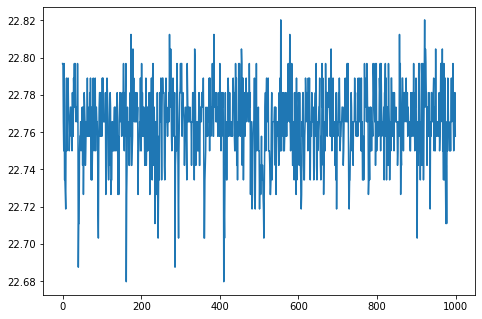

In [36]:
import serial
import time
from matplotlib import pyplot as plt
import numpy as np

f = open('data_tmp.csv', 'w')

ser = serial.Serial(
 port='/dev/ttyACM0',\
 baudrate=115200,\
 parity=serial.PARITY_NONE,\
 stopbits=serial.STOPBITS_ONE,\
 bytesize=serial.EIGHTBITS,\
 timeout=None)

ser.close()
ser.open()

print(f"connected to: {ser.portstr}")

time.sleep(1)

ser.write(b's')

print('Data:')
dataraw = []
for c in range(1001):
    inp = ser.readline().decode('utf-8').rstrip()
    dataraw.append(int(inp))
ser.write(b'e')
ser.flush()
ser.close()

dataraw.pop(0) #firt bad for same reasone

data = []
for item in dataraw:
    f.write(f'{item}\n')
    data.append(((item * 0.000078125)-0.5)/0.01)
f.close()

%matplotlib inline
x=np.arange(0, 1000, 1)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(x,data)
